### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import csv
import urllib.request

def cargar_datos_desde_url(url):
    response = urllib.request.urlopen(url)
    lines = [l.decode('utf-8') for l in response.readlines()]
    return list(csv.reader(lines))

# Cargamos los datos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = cargar_datos_desde_url(url1)
tienda2 = cargar_datos_desde_url(url2)
tienda3 = cargar_datos_desde_url(url3)
tienda4 = cargar_datos_desde_url(url4)

#1. Análisis de facturación



In [ ]:
def calcular_facturacion(datos_tienda):
    facturacion = 0.0
    for fila in datos_tienda[1:]:  # Ignoramos la cabecera (primera fila)
        precio = float(fila[2])    # El precio está en la posición 2 (tercer dato)
        facturacion += precio
    return facturacion

# Calculamos facturación para cada tienda
facturacion_tienda1 = calcular_facturacion(tienda1)
facturacion_tienda2 = calcular_facturacion(tienda2)
facturacion_tienda3 = calcular_facturacion(tienda3)
facturacion_tienda4 = calcular_facturacion(tienda4)

# Mostramos resultados
print(f"Facturación Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:,.2f}")

Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [ ]:
def ventas_por_categoria(datos_tienda):
    # Diccionario para almacenar resultados: {categoría: [conteo, ganancia_total]}
    resumen = {}

    for fila in datos_tienda[1:]:  # Ignoramos la cabecera
        categoria = fila[1]        # 'Categoría del Producto' está en posición 1
        precio = float(fila[2])    # 'Precio' está en posición 2

        if categoria in resumen:
            resumen[categoria][0] += 1      # Sumamos 1 al conteo
            resumen[categoria][1] += precio  # Sumamos el precio a la ganancia
        else:
            resumen[categoria] = [1, precio] # Inicializamos la categoría

    return resumen

# Calculamos para cada tienda
ventas_tienda1 = ventas_por_categoria(tienda1)
ventas_tienda2 = ventas_por_categoria(tienda2)
ventas_tienda3 = ventas_por_categoria(tienda3)
ventas_tienda4 = ventas_por_categoria(tienda4)

# Mostramos resultados para cada Tienda
print("\nVentas por categoría en Tienda 1:")
for categoria, (conteo, ganancia) in ventas_tienda1.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categoría en Tienda 2:")
for categoria, (conteo, ganancia) in ventas_tienda2.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categoría en Tienda 3:")
for categoria, (conteo, ganancia) in ventas_tienda3.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categoría en Tienda 4:")
for categoria, (conteo, ganancia) in ventas_tienda4.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")



Ventas por categoría en Tienda 1:
- Electrónicos: 448 productos, Ganancia = $429,493,500.00
- Muebles: 465 productos, Ganancia = $187,633,700.00
- Juguetes: 324 productos, Ganancia = $17,995,700.00
- Electrodomésticos: 312 productos, Ganancia = $363,685,200.00
- Artículos para el hogar: 171 productos, Ganancia = $12,698,400.00
- Deportes y diversión: 284 productos, Ganancia = $39,290,000.00
- Libros: 173 productos, Ganancia = $8,784,900.00
- Instrumentos musicales: 182 productos, Ganancia = $91,299,000.00

Ventas por categoría en Tienda 2:
- Muebles: 442 productos, Ganancia = $176,426,300.00
- Instrumentos musicales: 224 productos, Ganancia = $104,990,300.00
- Deportes y diversión: 275 productos, Ganancia = $34,744,500.00
- Electrónicos: 422 productos, Ganancia = $410,831,100.00
- Artículos para el hogar: 181 productos, Ganancia = $14,746,900.00
- Juguetes: 313 productos, Ganancia = $15,945,400.00
- Electrodomésticos: 305 productos, Ganancia = $348,567,800.00
- Libros: 197 productos, 

# 3. Calificación promedio de la tienda


In [ ]:
def calcular_promedio_calificaciones(datos_tienda):
    suma_calificaciones = 0
    total_registros = 0

    indice_calificacion = datos_tienda[0].index('Calificación')  # Posición de la columna

    for fila in datos_tienda[1:]:  # Ignoramos la cabecera
        calificacion = float(fila[indice_calificacion])  # Convertimos a número
        suma_calificaciones += calificacion
        total_registros += 1

    return suma_calificaciones / total_registros if total_registros > 0 else 0

# Calculamos el promedio para cada tienda
promedio_tienda1 = calcular_promedio_calificaciones(tienda1)
promedio_tienda2 = calcular_promedio_calificaciones(tienda2)
promedio_tienda3 = calcular_promedio_calificaciones(tienda3)
promedio_tienda4 = calcular_promedio_calificaciones(tienda4)

# Mostramos resultados
print(f"Promedio de calificaciones Tienda 1: {promedio_tienda1:.2f}")
print(f"Promedio de calificaciones Tienda 2: {promedio_tienda2:.2f}")
print(f"Promedio de calificaciones Tienda 3: {promedio_tienda3:.2f}")
print(f"Promedio de calificaciones Tienda 4: {promedio_tienda4:.2f}")

Promedio de calificaciones Tienda 1: 3.98
Promedio de calificaciones Tienda 2: 4.04
Promedio de calificaciones Tienda 3: 4.05
Promedio de calificaciones Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
from collections import Counter

def productos_mas_y_menos_vendidos(datos_tienda, nombre_tienda):
    indice_producto = datos_tienda[0].index('Producto')  # Posición de la columna 'Producto'
    productos = [fila[indice_producto] for fila in datos_tienda[1:]]  # Lista de todos los productos vendidos

    conteo_productos = Counter(productos)  # Cuenta las ocurrencias de cada producto

    # Producto más vendido (mayor conteo)
    producto_mas_vendido, cantidad_mas = conteo_productos.most_common(1)[0]

    # Producto menos vendido (menor conteo)
    producto_menos_vendido, cantidad_menos = conteo_productos.most_common()[-1]

    print(f"\n**Tienda: {nombre_tienda}**")
    print(f"Producto más vendido: '{producto_mas_vendido}' ({cantidad_mas} ventas)")
    print(f"Producto menos vendido: '{producto_menos_vendido}' ({cantidad_menos} ventas)")

# Aplicamos a cada tienda
productos_mas_y_menos_vendidos(tienda1, "Tienda 1")
productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
productos_mas_y_menos_vendidos(tienda4, "Tienda 4")


**Tienda: Tienda 1**
Producto más vendido: 'Microondas' (60 ventas)
Producto menos vendido: 'Celular ABXY' (33 ventas)

**Tienda: Tienda 2**
Producto más vendido: 'Iniciando en programación' (65 ventas)
Producto menos vendido: 'Juego de mesa' (32 ventas)

**Tienda: Tienda 3**
Producto más vendido: 'Kit de bancas' (57 ventas)
Producto menos vendido: 'Bloques de construcción' (35 ventas)

**Tienda: Tienda 4**
Producto más vendido: 'Cama box' (62 ventas)
Producto menos vendido: 'Guitarra eléctrica' (33 ventas)


# 5. Envío promedio por tienda

In [ ]:
def calcular_promedio_envio(datos_tienda, nombre_tienda):
    indice_envio = datos_tienda[0].index('Costo de envío')  # Posición de la columna
    costos_envio = []

    for fila in datos_tienda[1:]:  # Ignorar cabecera
        try:
            costo = float(fila[indice_envio])  # Convertir a número
            costos_envio.append(costo)
        except ValueError:  # Por si hay datos vacíos o no numéricos
            continue

    promedio = sum(costos_envio) / len(costos_envio) if costos_envio else 0
    print(f"Tienda {nombre_tienda}: Costo promedio de envío = ${promedio:,.2f}")

# Calcular para cada tienda
calcular_promedio_envio(tienda1, "1")
calcular_promedio_envio(tienda2, "2")
calcular_promedio_envio(tienda3, "3")
calcular_promedio_envio(tienda4, "4")

Tienda 1: Costo promedio de envío = $26,018.61
Tienda 2: Costo promedio de envío = $25,216.24
Tienda 3: Costo promedio de envío = $24,805.68
Tienda 4: Costo promedio de envío = $23,459.46


# RESUMEN

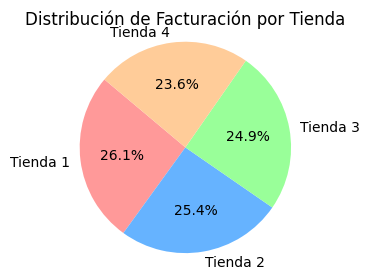

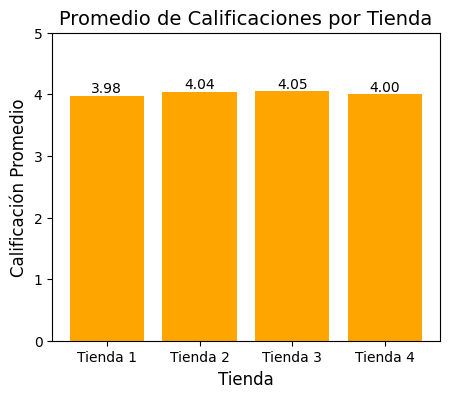

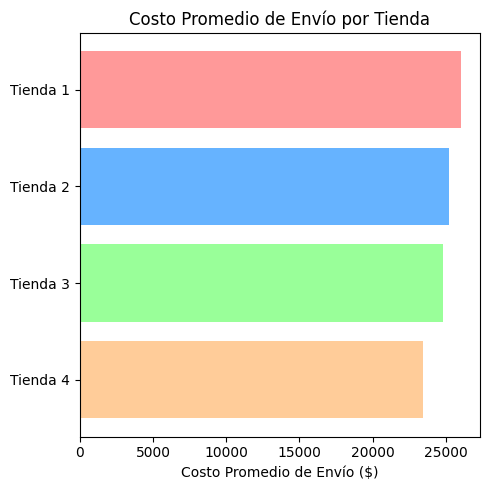

In [14]:
import matplotlib.pyplot as plt

facturacion = [1150880400, 1116343500, 1098019600, 1038375700]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(3,3))  # Tamaño reducido
plt.pie(facturacion, labels=tiendas, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Distribución de Facturación por Tienda')
plt.axis('equal')


tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [3.98, 4.04, 4.05, 4.00]

plt.figure(figsize=(5, 4))
bars = plt.bar(tiendas, promedios, color='#FFA500')

plt.title("Promedio de Calificaciones por Tienda", fontsize=14)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Calificación Promedio", fontsize=12)
plt.ylim(0, 5)  # Rango típico de calificaciones (0-5)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.2f}",
             ha='center', va='bottom')



tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [26018.61, 25216.24, 24805.68, 23459.46]
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Crear gráfico de barras horizontales
plt.figure(figsize=(5,5))  # Tamaño reducido, igual que el gráfico anterior
plt.barh(tiendas, costos_envio, color=colores)
plt.xlabel('Costo Promedio de Envío ($)')
plt.title('Costo Promedio de Envío por Tienda')

# Invertir eje Y para que Tienda 1 quede arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



# CONCLUSIONES

# 📊 Informe Comercial: Análisis de Desempeño de Tiendas

**Cliente:** Joao
**Fecha:** 14 de junio de 2025  
**Analista:** M. Gastón Kopelzon

---

## 1. Introducción

Con el objetivo de optimizar operaciones y maximizar la rentabilidad, se ha realizado un análisis detallado del desempeño de las cuatro tiendas activas. Este informe tiene como propósito determinar cuál de las cuatro tiendas sería la candidata más adecuada para su eventual cierre.

---

## 2. Análisis Comparativo

### 2.1 Facturación Anual

| Tienda   | Facturación ($)        |
|----------|------------------------|
| Tienda 1 | 1,150,880,400.00       |
| Tienda 2 | 1,116,343,500.00       |
| Tienda 3 | 1,098,019,600.00       |
| **Tienda 4** | **1,038,375,700.00**   |

➡️ **Tienda 4 presenta la facturación más baja**, con una diferencia de más de $112 millones respecto a Tienda 1.

---

### 2.2 Rentabilidad por Categoría

Aunque todas las tiendas generan ingresos en categorías similares, se observa lo siguiente en **Tienda 4**:

- La ganancia en **Electrodomésticos** ($283M) y **Electrónicos** ($409M) está por debajo de otras tiendas.
- Las ganancias en categorías menos rentables como **Juguetes**, **Libros** y **Artículos para el hogar** son comparativamente bajas.
- Su margen total es más reducido en casi todas las categorías respecto a las otras tiendas.

---

### 2.3 Calificaciones Promedio de Clientes

| Tienda   | Calificación Promedio |
|----------|------------------------|
| Tienda 1 | 3.98                   |
| Tienda 2 | 4.04                   |
| Tienda 3 | 4.05                   |
| **Tienda 4** | **4.00**               |

Aunque Tienda 4 no tiene una calificación baja, es la **segunda más baja** entre las cuatro, y no muestra una ventaja destacable en la satisfacción del cliente.

---

### 2.4 Costo Promedio de Envío

| Tienda   | Costo Promedio de Envío ($) |
|----------|------------------------------|
| Tienda 1 | 26,018.61                    |
| Tienda 2 | 25,216.24                    |
| Tienda 3 | 24,805.68                    |
| **Tienda 4** | **23,459.46**                |

🔹 Aunque **Tienda 4 tiene el menor costo de envío**, esta ventaja no compensa la menor facturación ni los márgenes de ganancia más bajos.

---

### 2.5 Productos Vendidos

- **Producto más vendido en Tienda 4:** `Cama box` (62 ventas)  
- **Producto menos vendido en Tienda 4:** `Guitarra eléctrica` (33 ventas)

Estos niveles de ventas no representan una ventaja significativa frente a las demás tiendas.

---

## 3. Conclusión

Tras analizar los indicadores clave de desempeño —facturación, rentabilidad por categoría, calificación de clientes, productos vendidos y costos logísticos— se concluye que:

### ❗ **Tienda 4 es la candidata más propensa a ser cerrada.**

Esto se debe principalmente a:

- La **facturación más baja** del grupo.
- **Menores márgenes de ganancia** en categorías clave.
- Una calificación de cliente inferior respecto a la media.
- Un desempeño general sin ventajas competitivas significativas que justifiquen su continuidad.

---

## 4. Recomendaciones

- Iniciar una evaluación operativa y de personal en Tienda 4 para preparar un plan de cierre controlado.
- Analizar la posibilidad de **redistribuir inventario y personal** a las tiendas con mejor desempeño (especialmente Tienda 1).
- Comunicar el proceso a los clientes y empleados de manera transparente, con foco en mantener la experiencia de marca.






---

